# Data Extraction and Preparation MOST PLAYED


# Extracción de canciones en top200

In [12]:
# INSTALAR PREVIAMENTE PARA EJECUTAR TODOS LOS NOTEBOOKS:
# !pip install fycharts
# !pip install spotipy
# !pip install altair vega_datasets
# !pip install seaborn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import altair as alt

# Configuración visual
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [13]:
# Region seleccionada para extraer los datos:
region_select = ["es"]
# region_select = ["global"]

# Datetimes de año 2020 ESPAÑA
fecha_inicial_2020_es= datetime(2020, 1, 1)
fecha_fin_2020_es= datetime(2020, 12, 31)
out_file_csv_2020_es= "data_allyear/top_200_daily_CSV_YEARGLOBAL_{}.csv".format(fecha_inicial_2020_es.year)

# Datetimes de año 2020 GLOBAL
fecha_inicial_2020_global= datetime(2020, 1, 1)
fecha_fin_2020_global= datetime(2020, 12, 31)
out_file_csv_2020_global= "data_allyear/top_200_daily_CSV_YEARGLOBAL_{}.csv".format(fecha_inicial_2020_global.year)

print('Días totales seleccionados 2020:', fecha_fin_2020_es - fecha_inicial_2020_es)

Días totales seleccionados 2020: 365 days, 0:00:00


In [14]:
# Función para EXTRACCIÓN, sólo ejecutar una vez
'''

def extraction_tracks(fecha_inicial, fecha_final, region_select, out_file_db, out_file_csv):
    from fycharts.SpotifyCharts import SpotifyCharts
    import sqlalchemy
    
    api = SpotifyCharts()
    connector = sqlalchemy.create_engine(out_file_db, echo=False)
    api.top200Daily(output_file = out_file_csv, output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial, end = fecha_final, region = region_select)

# Extracción de canciones
# SOLO EJECUTAR UNA VEZ INICIAL, NO HACE FALTA VOLVER A EJECUTARLO Y SE GUARDAN LOS DATOS EN CSV EN LA RAÍZ, TARDA 7-10 MINUTOS.


Time1 = datetime.now()

extraction_tracks(fecha_inicial_2020.strftime('%Y-%m-%d'), fecha_fin_2020.strftime('%Y-%m-%d'),
                  region_select, out_file_db_2020, out_file_csv_2020)
                  
Time2 = datetime.now()

print("Tiempo ejecución:", Time2 -Time1)

'''

'\n\ndef extraction_tracks(fecha_inicial, fecha_final, region_select, out_file_db, out_file_csv):\n    from fycharts.SpotifyCharts import SpotifyCharts\n    import sqlalchemy\n    \n    api = SpotifyCharts()\n    connector = sqlalchemy.create_engine(out_file_db, echo=False)\n    api.top200Daily(output_file = out_file_csv, output_db = connector, webhook = "https://mywebhookssite.com/post/", \n                start = fecha_inicial, end = fecha_final, region = region_select)\n\n# Extracción de canciones\n# SOLO EJECUTAR UNA VEZ INICIAL, NO HACE FALTA VOLVER A EJECUTARLO Y SE GUARDAN LOS DATOS EN CSV EN LA RAÍZ, TARDA 7-10 MINUTOS.\n\n\nTime1 = datetime.now()\n\nextraction_tracks(fecha_inicial_2020.strftime(\'%Y-%m-%d\'), fecha_fin_2020.strftime(\'%Y-%m-%d\'),\n                  region_select, out_file_db_2020, out_file_csv_2020)\n                  \nTime2 = datetime.now()\n\nprint("Tiempo ejecución:", Time2 -Time1)\n\n'

## Importamos los resultados extraídos

Primer vistazo y comprobaciones. Las columnas son:
- **Position:** Posición en el Top200 en dicho día (no nos interesa)
- **Track name:** Nombre de canción
- **Artist:** Artista
- **Streams:** Reproducciones que ha tenido ese día dicha canción. ESTE NOS INTERESA MUCHO
- **date:** Fecha del top200
- **region:** país del Top200
- **Spotify_id:** Identificación única de la canción


In [15]:
# Importamos la tabla con los datos y miramos a ver qué tal están y eliminar valores nulos
data_top200_2020_es= pd.read_csv("data/top_200_daily_2020_es.csv")
data_top200_2020_global= pd.read_csv("data/top_200_daily_2020_global.csv")

# Revisar si hay valores nulos y tamaños de bases de datos, que deberían ser exactas en tamaño
print(data_top200_2020_es.isnull().sum())
print('2020:', data_top200_2020_es.shape)
print(data_top200_2020_global.isnull().sum())
print('2020:', data_top200_2020_global.shape)

data_top200_2020_es.head()

Position      200
Track Name    203
Artist        203
Streams       200
date            0
region          0
spotify_id    201
dtype: int64
2020: (72800, 7)
Position      600
Track Name    600
Artist        600
Streams       600
date            0
region          0
spotify_id    600
dtype: int64
2020: (73200, 7)


,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,Tusa,KAROL G,344475.0,2020-01-01,es,7k4t7uLgtOxPwTpFmtJNTY
1,2.0,Alocao (With Bad Gyal),Omar Montes,253372.0,2020-01-01,es,6RyuoOJXNzlVWpfC5xQyeI
2,3.0,Dance Monkey,Tones And I,216578.0,2020-01-01,es,1rgnBhdG2JDFTbYkYRZAku
3,4.0,China,Anuel AA,192148.0,2020-01-01,es,2ksOAxtIxY8yElEWw8RhgK
4,5.0,RITMO (Bad Boys For Life),Black Eyed Peas,188835.0,2020-01-01,es,6cy3ki60hLwimwIje7tALf


Una vez echado un vistazo, importamos los datos que queremos


In [16]:
# Importamos con las columnas que nos interesan y quitamos null
# https://stackoverflow.com/questions/17465045/can-pandas-automatically-recognize-dates#comment74606353_17468012
data_top200_2020_es = pd.read_csv("data/top_200_daily_2020_es.csv", parse_dates= ["date"], usecols=['Track Name', 'region', 'Artist', 'date', 'Streams','spotify_id']).dropna()
data_top200_2020_global = pd.read_csv("data/top_200_daily_2020_global.csv", parse_dates= ["date"], usecols=['Track Name', 'region', 'Artist', 'date', 'Streams','spotify_id']).dropna()

# Meto el año, los meses y los días en nuevas columnas que nos servirá más adelante.
data_top200_2020_es['year'] = pd.DatetimeIndex(data_top200_2020_es['date']).year
data_top200_2020_es['month'] = pd.DatetimeIndex(data_top200_2020_es['date']).month
data_top200_2020_es['week'] = pd.DatetimeIndex(data_top200_2020_es['date']).week
data_top200_2020_es['day'] = pd.DatetimeIndex(data_top200_2020_es['date']).day
data_top200_2020_es['year_month'] = pd.to_datetime(data_top200_2020_es['date']).dt.to_period('M')
data_top200_2020_global['year'] = pd.DatetimeIndex(data_top200_2020_global['date']).year
data_top200_2020_global['month'] = pd.DatetimeIndex(data_top200_2020_global['date']).month
data_top200_2020_global['week'] = pd.DatetimeIndex(data_top200_2020_global['date']).week
data_top200_2020_global['day'] = pd.DatetimeIndex(data_top200_2020_global['date']).day
data_top200_2020_global['year_month'] = pd.to_datetime(data_top200_2020_global['date']).dt.to_period('M')

#Convertir column a datetime, que había quedado suelta
data_top200_2020_es['date'] = pd.to_datetime(data_top200_2020_es['date'])
data_top200_2020_global['date'] = pd.to_datetime(data_top200_2020_global['date'])

# Concateno los datos de todos los años
data_top200_2020_all = pd.concat([data_top200_2020_es, data_top200_2020_global], axis=0,)


# data_top200_2020.loc[data_top200_2020['date'] == 'es']
# data_top200_2020['week'].value_counts(ascending=True)
print(data_top200_2020_es.isnull().sum())
print(data_top200_2020_global.isnull().sum())

Track Name    0
Artist        0
Streams       0
date          0
region        0
spotify_id    0
year          0
month         0
week          0
day           0
year_month    0
dtype: int64
Track Name    0
Artist        0
Streams       0
date          0
region        0
spotify_id    0
year          0
month         0
week          0
day           0
year_month    0
dtype: int64


Hacemos algunas comprobaciones básicas, pero ojo! No hay mismo número de Track Names e spotify_ID, porque una canción con el mismo nombre puede estar en diferentes albunes y entonces le asignan una spotify_ID diferente, por eso hay más spotify_IDs que Track Names. Por ejemplo puede pasar fácilmente en recopilatorios.

In [17]:
# Revisión
print(data_top200_2020_all.shape)
print(data_top200_2020_all.dtypes)
print(data_top200_2020_all.nunique())
print(data_top200_2020_all.groupby(['region']).sum())
data_top200_2020_all.groupby(['region']).count()

(145197, 11)
Track Name            object
Artist                object
Streams              float64
date          datetime64[ns]
region                object
spotify_id            object
year                   int64
month                  int64
week                   int64
day                    int64
year_month         period[M]
dtype: object
Track Name      2569
Artist           820
Streams       120810
date             363
region             2
spotify_id      2902
year               1
month             12
week              53
day               31
year_month        12
dtype: int64
             Streams       year   month     week      day
region                                                   
es      6.399289e+09  146645940  469570  1939271  1135337
global  9.440849e+10  146652000  469600  1939400  1135400


,Track Name,Artist,Streams,date,spotify_id,year,month,week,day,year_month
region,,,,,,,,,,
es,72597,72597,72597,72597,72597,72597,72597,72597,72597,72597
global,72600,72600,72600,72600,72600,72600,72600,72600,72600,72600


## Calcular Streamstotales de canción en total por region y el año entero

In [18]:
data_top200_sumastreams_es = data_top200_2020_all.groupby(['spotify_id','region'])['Streams'].sum()
data_top200_pre_withstreams = pd.merge(data_top200_2020_all, data_top200_sumastreams_es, on=['spotify_id', 'region'], how='inner')
data_top200_pre_withstreams.rename(columns = {'Streams_y': 'streams_allyear'}, inplace = True)

data_top200_pre_withstreams[data_top200_pre_withstreams['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']

#Exportamos
data_top200_pre_withstreams.to_csv("data/data_top200_pre_withstreams.csv", sep = ',')
data_top200_pre_withstreams.head(1)


,Track Name,Artist,Streams_x,date,region,spotify_id,year,month,week,day,year_month,streams_allyear
0,Tusa,KAROL G,344475.0,2020-01-01,es,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,1,2020-01,89674693.0


In [19]:
'''
# POR REGION Y MES
# Agrupar sumas y convertir en Dataframe
data_top200_sumastreams_month = data_top200.groupby('year_month')['Streams'].sum()
data_top200_sumastreams_month = pd.DataFrame({'year_month':data_top200_sumastreams_month.index, 'Streams':data_top200_sumastreams_month.values})

# Después de muchos intentos, encontré una forma superfácil de hacerlo
data_top200_merged_month = pd.merge(data_top200, data_top200_sumastreams_month, on=['year_month'], how='inner')
data_top200_merged_month.rename(columns = {'Streams_y': 'streams_month', 'Streams_x': 'streams_song_day'}, inplace = True)


#POR DÍA
data_top200_sumastreams_days = data_top200_merged_year.groupby('date')['streams_song_day'].sum()
data_top200_sumastreams_days = pd.DataFrame({'date':data_top200_sumastreams_days.index, 'streams_song_day':data_top200_sumastreams_days.values})

# Después de muchos intentos, encontré una forma superfácil de hacerlo
data_top200_merged_final = pd.merge(data_top200_merged_year, data_top200_sumastreams_days, on=['date'], how='inner')
data_top200_merged_final.rename(columns = {'streams_song_day_y': 'streams_day', 'streams_song_day_x': 'streams_song_day'}, inplace = True)


data_top200_merged_final.to_csv("data_allyear/data_ana_timeseries_streamsongs.csv", sep = ',')
data_top200_merged_final.dtypes
'''

'\n# POR REGION Y MES\n# Agrupar sumas y convertir en Dataframe\ndata_top200_sumastreams_month = data_top200.groupby(\'year_month\')[\'Streams\'].sum()\ndata_top200_sumastreams_month = pd.DataFrame({\'year_month\':data_top200_sumastreams_month.index, \'Streams\':data_top200_sumastreams_month.values})\n\n# Después de muchos intentos, encontré una forma superfácil de hacerlo\ndata_top200_merged_month = pd.merge(data_top200, data_top200_sumastreams_month, on=[\'year_month\'], how=\'inner\')\ndata_top200_merged_month.rename(columns = {\'Streams_y\': \'streams_month\', \'Streams_x\': \'streams_song_day\'}, inplace = True)\n\n\n#POR DÍA\ndata_top200_sumastreams_days = data_top200_merged_year.groupby(\'date\')[\'streams_song_day\'].sum()\ndata_top200_sumastreams_days = pd.DataFrame({\'date\':data_top200_sumastreams_days.index, \'streams_song_day\':data_top200_sumastreams_days.values})\n\n# Después de muchos intentos, encontré una forma superfácil de hacerlo\ndata_top200_merged_final = pd.merg

## Seleccionar cantidad de canciones y artistas a extraer

In [20]:
#Sacar lista de CANCIONES TOTALES (con repetición) para luego sacar las Features
list_ids = data_top200_pre_withstreams['spotify_id'].tolist()
print('id de ejemplo', list_ids[0])
print('Canciones totales:', len(list_ids))

# Quitar duplicados, QUEDARNOS CON CANCIONES ÚNICAS
list_ids = list(set(list_ids))
print('Canciones totales únicas:' ,len(list_ids))

# Quitar una canción identificada que jode la extracción
# list_ids.remove('3uMIfxV8q5tPTWzJh8s6Mk')

# Lista final a extraer
test_list = list_ids[0:3000]
len(test_list)


id de ejemplo 7k4t7uLgtOxPwTpFmtJNTY
Canciones totales: 145197
Canciones totales únicas: 2902


2902

In [21]:
#Sacar lista de ARTISTAS TOTALES
list_artist = data_top200_pre_withstreams['Artist'].tolist()
print('nombre de ejemplo:', list_artist[0])
print('Artistas totales:', len(list_artist))

# Quitar duplicados, QUEDARNOS CON ARTISTAS ÚNICOS
list_artist = list(set(list_artist))
print('Artistas totales únicos:' ,len(list_artist))

# Lista final a extraer
test_list_artist = list_artist[0:1000]
len(test_list_artist)


nombre de ejemplo: KAROL G
Artistas totales: 145197
Artistas totales únicos: 820


820

In [22]:
print(test_list[1093:1094])
data_top200_2020_all[data_top200_2020_all['spotify_id'] == '7lidXGPXPYLNThITAOTlkK']

['1xNHX3NVN55SDa6ptBjTY1']


,Track Name,Artist,Streams,date,region,spotify_id,year,month,week,day,year_month
3349,You should be sad,Halsey,45020.0,2020-01-17,es,7lidXGPXPYLNThITAOTlkK,2020,1,3,17,2020-01
3574,You should be sad,Halsey,38155.0,2020-01-18,es,7lidXGPXPYLNThITAOTlkK,2020,1,3,18,2020-01
3767,You should be sad,Halsey,32733.0,2020-01-19,es,7lidXGPXPYLNThITAOTlkK,2020,1,3,19,2020-01
3951,You should be sad,Halsey,37962.0,2020-01-20,es,7lidXGPXPYLNThITAOTlkK,2020,1,4,20,2020-01
4163,You should be sad,Halsey,36441.0,2020-01-21,es,7lidXGPXPYLNThITAOTlkK,2020,1,4,21,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
29764,You should be sad,Halsey,680827.0,2020-05-28,global,7lidXGPXPYLNThITAOTlkK,2020,5,22,28,2020-05
30593,You should be sad,Halsey,615365.0,2020-06-01,global,7lidXGPXPYLNThITAOTlkK,2020,6,23,1,2020-06
30996,You should be sad,Halsey,619201.0,2020-06-03,global,7lidXGPXPYLNThITAOTlkK,2020,6,23,3,2020-06
31193,You should be sad,Halsey,621339.0,2020-06-04,global,7lidXGPXPYLNThITAOTlkK,2020,6,23,4,2020-06


# Extracción FEATURES desde API SPOTIFY



In [26]:
#Preparación de Spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 

# IMPORTANTE INTRODUCIR OTRAS CREDENCIALES, LAS USADAS ESTÁN CAMBIADAS.
passw = pd.read_csv("pass_spotify.txt", sep = ',', encoding="utf-8")
client_id = passw.columns[0]
client_secret = passw.columns[1]

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [27]:
#Hacemos una prueba para ver las features que hay de una canción concreta por su ID
track_ids = sp.user_playlist_tracks(playlist_id='1ebwiiN18Gmhfj6e24pT3X', fields='items(track(id))')
sp.audio_features(track_ids['items'][5]['track']['id'])

[{'danceability': 0.669,
  'energy': 0.829,
  'key': 1,
  'loudness': -3.801,
  'mode': 1,
  'speechiness': 0.49,
  'acousticness': 0.179,
  'instrumentalness': 0,
  'liveness': 0.241,
  'valence': 0.61,
  'tempo': 118.934,
  'type': 'audio_features',
  'id': '2eOuL8KesslTLQERQPu11D',
  'uri': 'spotify:track:2eOuL8KesslTLQERQPu11D',
  'track_href': 'https://api.spotify.com/v1/tracks/2eOuL8KesslTLQERQPu11D',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2eOuL8KesslTLQERQPu11D',
  'duration_ms': 253067,
  'time_signature': 4}]

In [28]:
# FUNCIÓN COMPLETA PARA EXTRACCIÓN DE FEATURES DE LISTA DE CANCIONES
##### Función para sacar las features de canciones que me interesan desde la id
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  valence = features[0]['valence']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  id = features[0]['id']

  track = [name, album, artist, release_date, length, popularity,
           acousticness, danceability, energy, instrumentalness,
           liveness, loudness, speechiness, valence, tempo, time_signature, id]
  return track


##### Loop para sacar features de todas las canciones de una lista, devuelve un dataframe
def extract_songs(list_toextract):
    import time
    tracks = []
    num_song = 0
    for i in range(len(list_toextract)):
        time.sleep(.10)
        track = getTrackFeatures(list_toextract[i])
        tracks.append(track)
        print("Song extracted:", num_song)
        num_song += 1

    # Metemos la info en Dataframe
    data_features = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date',
                                                 'length', 'popularity','acousticness', 'danceability', 'energy',
                                                 'instrumentalness', 'liveness', 'loudness',
                                                 'speechiness', 'valence','tempo', 'time_signature', 'id'])

    data_features_final = data_features [['name','artist','album','release_date','length', 'popularity',
                                                 'acousticness', 'danceability', 'energy',
                                                 'instrumentalness', 'liveness', 'loudness',
                                                 'speechiness', 'valence','tempo', 'time_signature', 'id']]

    data_features_final = data_features_final.rename(columns = {'id':'spotify_id'})

    # Finalmente meto el año de Release date (lanzamiento de la canción) en un nueva columna que me va a vernir en uno de los análisis
    data_features_final['release_date_year'] = pd.to_datetime(data_features_final['release_date'])
    data_features_final['release_date_year'] = pd.DatetimeIndex(data_features_final['release_date']).year
    print(data_features_final.shape)
    data_features_final.head(4)

    #Normalizamos features
    features_to_normalize = ['length', 'popularity', 'loudness', 'tempo', 'speechiness']

    data_features_final[features_to_normalize] = data_features_final[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

    return data_features_final

In [69]:
# Extracción de datos, OJO!!!! la extracción tarda 45 minutos

Time1 = datetime.now()
data_top200_pre_withfeatures = extract_songs(test_list)
Time2 = datetime.now()

# Exportamos
data_top200_pre_withfeatures.to_csv("data/data_top200_pre_withfeatures.csv", sep = ',')

print("Tiempo ejecución extracción:", Time2 -Time1)
data_top200_pre_withfeatures.shape


Song extracted: 0
Song extracted: 1
Song extracted: 2
Song extracted: 3
Song extracted: 4
Song extracted: 5
Song extracted: 6
Song extracted: 7
Song extracted: 8
Song extracted: 9
Song extracted: 10
Song extracted: 11
Song extracted: 12
Song extracted: 13
Song extracted: 14
Song extracted: 15
Song extracted: 16
Song extracted: 17
Song extracted: 18
Song extracted: 19
Song extracted: 20
Song extracted: 21
Song extracted: 22
Song extracted: 23
Song extracted: 24
Song extracted: 25
Song extracted: 26
Song extracted: 27
Song extracted: 28
Song extracted: 29
Song extracted: 30
Song extracted: 31
Song extracted: 32
Song extracted: 33
Song extracted: 34
Song extracted: 35
Song extracted: 36
Song extracted: 37
Song extracted: 38
Song extracted: 39
Song extracted: 40
Song extracted: 41
Song extracted: 42
Song extracted: 43
Song extracted: 44
Song extracted: 45
Song extracted: 46
Song extracted: 47
Song extracted: 48
Song extracted: 49
Song extracted: 50
Song extracted: 51
Song extracted: 52
Son

(2902, 18)

# Extracción GÉNEROS desde API SPOTIFY

## Extraer los géneros de todas las canciones

In [29]:
# IMPORTANTE!!! Esta celda tarda en ejecutarse

# Selecciono la lista final a extraer completa
list_toextract_artist = test_list_artist

# Función para extraerlos, en lotes de 50 porque es el máximo que te deja la API de Spotify
def extract_artist(artist_list):
    count_artist= 0
    data = ['test11111111', 'tes111111', 'test111111', 0, 0]
    df_final = pd.DataFrame([data], columns=["id", "name", "genres", 'followers', 'popularity'])
    
    API_LIMIT = 50
    search_list = []

    for artist in artist_list:
        count_artist += 1
        search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT)
        
        count_oneartist= 0 # Se añade un contador par quedarnos sólo con la primera búsqueda que he comprobado que siempre es la buena.
        for t in search_results['artists']['items']:
            count_oneartist += 1
            if count_oneartist ==2:
                break
            else:
                search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']]]
        
        df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])
        
        df_final = df_final.append(df_search) # El problema de esto es que crea duplicados pero no nos afecta en lo que necesitamos
    print('Artist count:', count_artist)  
    return df_final

# Extracción de los datos
Time1 = datetime.now()
data_top200_pre_withgenres = extract_artist(list_toextract_artist)
Time2 = datetime.now()

# Exportamos
data_top200_pre_withgenres.to_csv("data/data_top200_pre_withgenres.csv", sep = ',')

print("Tiempo ejecución:", Time2 -Time1)
print(data_top200_pre_withgenres.shape)
data_top200_pre_withgenres.head(6)



Artist count: 820
Tiempo ejecución: 0:01:19.581360
(334617, 5)


,id,name,genres,followers,popularity
0,test11111111,tes111111,test111111,0,0
0,5bWUlnPx9OYKsLiUJrhCA1,Jon Z,"[reggaeton, reggaeton flow, trap latino]",2987783,77
0,5bWUlnPx9OYKsLiUJrhCA1,Jon Z,"[reggaeton, reggaeton flow, trap latino]",2987783,77
1,3oSJ7TBVCWMDMiYjXNiCKE,Kane Brown,"[contemporary country, country road]",3308713,80
0,5bWUlnPx9OYKsLiUJrhCA1,Jon Z,"[reggaeton, reggaeton flow, trap latino]",2987783,77
1,3oSJ7TBVCWMDMiYjXNiCKE,Kane Brown,"[contemporary country, country road]",3308713,80


In [30]:
data_top200_pre_withgenres.head(4)

,id,name,genres,followers,popularity
0,test11111111,tes111111,test111111,0,0
0,5bWUlnPx9OYKsLiUJrhCA1,Jon Z,"[reggaeton, reggaeton flow, trap latino]",2987783,77
0,5bWUlnPx9OYKsLiUJrhCA1,Jon Z,"[reggaeton, reggaeton flow, trap latino]",2987783,77
1,3oSJ7TBVCWMDMiYjXNiCKE,Kane Brown,"[contemporary country, country road]",3308713,80


## Dividir los generos

In [31]:
# IMPORTANTE!! Tarda en ejecutarse dependiendo del número de artistas, menos de 1 minuto.

df_genres = data_top200_pre_withgenres.copy()

# Creamos una copia de la columna genres para mantenerla y la trasnformo a strings
df_genres['genres_together'] = df_genres['genres'].copy()
df_genres['genres_together'] = [','.join(i) if isinstance(i, list) else i for i in df_genres['genres_together']]

# Como la columna genres es una lista con los diferentes géneros, he preferido separarlo en columnas y mantener ciertas columnas sólo
df_genres2 = pd.concat([df_genres['genres'].apply(pd.Series), df_genres[['genres_together',
                                                                         'id',
                                                                         "name",
                                                                         'followers',
                                                                         'popularity']]], axis = 1)
# Quitamos los artistas duplicados
df_genres3 = df_genres2.drop_duplicates(df_genres2.columns[~df_genres2.columns.isin(['id'])])

#Renombramos columnas por nuestra salud de luego entenderlo mejor
df_genres4 = df_genres3.rename(columns={0:'genre1',
                   1:'genre2',
                   2:'genre3',
                   3:'genre4',
                   4:'genre5',
                   5:'genre6',
                   6:'genre7',
                   7:'genre8',
                   8:'genre9',
                   9:'genre10',
                   'genres_together':'genres_together',
                   'id':'artist_id',
                   'name':'Artist',
                   'followers':'artist_followers',
                   'popularity':'artist_popularity'}).copy()
print(df_genres4.shape)
print(len(df_genres4['Artist'].unique()))
df_genres4.head(10)

(808, 19)
808


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,10,11,12,13,genres_together,artist_id,Artist,artist_followers,artist_popularity
0,test111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test111111,test11111111,tes111111,0,0
0,reggaeton,reggaeton flow,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"reggaeton,reggaeton flow,trap latino",5bWUlnPx9OYKsLiUJrhCA1,Jon Z,2987783,77
1,contemporary country,country road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"contemporary country,country road",3oSJ7TBVCWMDMiYjXNiCKE,Kane Brown,3308713,80
2,cancion melodica,cantautor,pop romantico,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"cancion melodica,cantautor,pop romantico,spani...",1TiGxAkU8w0xBCVFOP6Ttl,Duo Dinamico,133284,52
3,big room,dance pop,edm,pop,pop dance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"big room,dance pop,edm,pop,pop dance",1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,22481839,91
4,pop,pop rap,r&b,southern hip hop,trap,trap soul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"pop,pop rap,r&b,southern hip hop,trap,trap soul",7c0XG5cIJTrrAgEC3ULPiq,Ty Dolla $ign,3764602,89
5,album rock,classic rock,hard rock,metal,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"album rock,classic rock,hard rock,metal,rock",2cnMpRsOVqtPMfq7YiFE6K,Van Halen,3904575,77
6,canadian contemporary r&b,pop,r&b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"canadian contemporary r&b,pop,r&b",20wkVLutqVOYrc0kxFs7rA,Daniel Caesar,2614140,90
7,dance pop,neo soul,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"dance pop,neo soul,pop",3hv9jJF3adDNsBSIQDqcjp,Mark Ronson,904573,80
8,flamenco urbano,trap latino,urbano espanol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"flamenco urbano,trap latino,urbano espanol",0FwnPHExlRRxEZPLAi5tmG,JC Reyes,13563,60


In [32]:
number_genres = df_genres4.genre1.value_counts()
number_genres.head(20)

dance pop            66
latin                58
adult standards      33
alt z                23
cantautor            16
pop                  15
rap espanol          15
atl hip hop          14
flamenco urbano      14
album rock           13
reggaeton            12
german hip hop       11
hip hop              11
melodic rap          11
colombian pop        11
latin pop            10
latin viral pop       9
k-pop                 9
argentine hip hop     8
spanish pop           8
Name: genre1, dtype: int64

In [33]:
# Hacemos una prueba con un artista
df_genres4[df_genres4['Artist'] == 'Bryant Myers']

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,10,11,12,13,genres_together,artist_id,Artist,artist_followers,artist_popularity
110,latin,reggaeton,reggaeton flow,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton flow,trap latino",6w9ToX5slZ4uIdmD17hJ3c,Bryant Myers,4862783,82


In [34]:
# Decido aprovechar y normalizar también el artist popularity por si lo uso posteriormente
features_to_normalize2 = ['artist_popularity']
df_genres4[features_to_normalize2] = df_genres4[features_to_normalize2].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

# Reseteo index y quito fila y columnas sobrantes
df_genres5 = df_genres4.reset_index()
df_genres6 = df_genres5.drop(['index'], axis=1)
data_top200_pre_withgenres_final = df_genres6.drop(df_genres6.index[0])

# Lo vemos
print(data_top200_pre_withgenres_final.shape)
data_top200_pre_withgenres_final.head(4)

(807, 19)


## Agrupación de géneros

In [44]:
# Aplicación de agrupación

#Quitamis un warning deprecated que nos sale
import warnings
warnings.filterwarnings('ignore')

data_ana_corona = df_genres

# Grupos de géneros:
list_genres_pop = 'pop, k-pop, boy band, eurovision, carnaval'
list_genres_dance = 'dance, tropical, edm, electropop, big room'
list_genres_rock = 'rock, indie'
list_genres_reggaeton = 'dembow, reggaeton, champeta, cubaton'
list_genres_rap = "rap, hip hop, funk, trap, r&b"
cantautor = 'cantautor, flamenco'

# Reglas de categorización (busqué formas de hacerlo más nuevas, pero no cosneguí que funcionara)
data_ana_corona['genre_depurated_final'] = pd.np.where(data_ana_corona.genre1.str.contains("dance"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("tropical"), 'dance, electro and ambient',            
                              pd.np.where(data_ana_corona.genre1.str.contains("edm"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("electropop"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("big room"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("new french"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("house"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("brostep"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("alt z"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("electro"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("disco"), 'dance, electro and ambient',            
                                          
                              pd.np.where(data_ana_corona.genre1.str.contains("pop"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("k-pop"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("carnaval"), 'pop, new age and standards',                      
                              pd.np.where(data_ana_corona.genre1.str.contains("eurovision"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("boy band"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("electropop"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("neo mellow"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("hollywood"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("adult standards"), 'pop, new age and standards',
                        
                              pd.np.where(data_ana_corona.genre1.str.contains("rock"), 'rock, country and indie',
                              pd.np.where(data_ana_corona.genre1.str.contains("metal"), 'rock, country and indie', 
                              pd.np.where(data_ana_corona.genre1.str.contains("indie"), 'rock, country and indie',
                              pd.np.where(data_ana_corona.genre1.str.contains("country"), 'rock, country and indie',
                              pd.np.where(data_ana_corona.genre1.str.contains("cantautor"), 'rock, country and indie',
                              pd.np.where(data_ana_corona.genre1.str.contains("punk"), 'rock, country and indie',
                              pd.np.where(data_ana_corona.genre1.str.contains("ska"), 'rock, country and indie',            
                                          
                              pd.np.where(data_ana_corona.genre1.str.contains("latin"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("latino"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("bachata"), 'latin and reggaeton',                               
                              pd.np.where(data_ana_corona.genre1.str.contains("dembow"), 'latin and reggaeton',            
                              pd.np.where(data_ana_corona.genre1.str.contains("reggaeton"), 'latin and reggaeton',            
                              pd.np.where(data_ana_corona.genre1.str.contains("champeta"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("cubaton"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("rumba"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("perreo"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("flamenco"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("salsa"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("villancicos"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("urbano espanol"), 'latin and reggaeton',            
                              pd.np.where(data_ana_corona.genre1.str.contains("corrido"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("bolero"), 'latin and reggaeton',
                                          
                              pd.np.where(data_ana_corona.genre1.str.contains("hip hop"), 'hip hop, r&b and soul',            
                              pd.np.where(data_ana_corona.genre1.str.contains("rap"), 'hip hop, r&b and soul',            
                              pd.np.where(data_ana_corona.genre1.str.contains("funk"), 'hip hop, r&b and soul',            
                              pd.np.where(data_ana_corona.genre1.str.contains("trap"), 'hip hop, r&b and soul',            
                              pd.np.where(data_ana_corona.genre1.str.contains("r&b"), 'hip hop, r&b and soul',
                              pd.np.where(data_ana_corona.genre1.str.contains("soul"), 'hip hop, r&b and soul',
                                          
                                                    
                                    
                                          "other"))))))))))))))))))))))))))))))))))))))))))))))))

# Vemos unas pruebas
# data_ana_corona[data_ana_corona['genre_depurated'] == 'dembow']
# data_ana_corona[data_ana_corona['genre_depurated'] == 'new french touch']
df_genre_final = pd.value_counts(df_genres.genre_depurated_final)
df_genre_final.head(50)

hip hop, r&b and soul         201
pop, new age and standards    185
dance, electro and ambient    164
latin and reggaeton           124
rock, country and indie        67
other                          66
Name: genre_depurated_final, dtype: int64

In [45]:
# Vemos los Other par aagruparlos mejor
other = data_ana_corona[data_ana_corona['genre_depurated_final'] == 'other']
df_genre_other = pd.value_counts(other.genre1)
df_genre_other.head(60)
# df_genre_initial.count()

sertanejo                  4
afroswing                  3
brooklyn drill             3
chicago drill              2
cancion melodica           2
halloween                  2
basshall                   2
banda                      2
musica catalana            2
gruperas inmortales        2
permanent wave             2
drill espanol              2
forro                      2
musical advocacy           2
mariachi                   1
a cappella                 1
musica jibara              1
russelater                 1
irish singer-songwriter    1
classical guitar           1
circuit                    1
drill francais             1
irish pub song             1
pagode                     1
german drill               1
classic schlager           1
afrofuturism               1
copla                      1
musica para ninos          1
complextro                 1
grime                      1
francoton                  1
classical performance      1
gospel                     1
movie tunes   

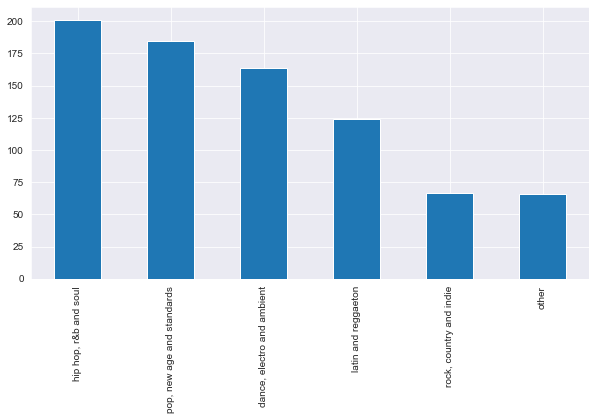

In [46]:
number_genres_new = data_ana_corona.genre_depurated_final.value_counts()
plt.figure(figsize=(10,5)) 
number_genres_new.plot.bar()
plt.show()

In [48]:
# Exportamos!
data_ana_corona.to_csv("data/data_top200_pre_withgenres_final.csv", sep = ',')

# Juntamos dataframes de extracción canciones + extracción features + géneros

In [68]:
# Importamos Dataframes
df_genres = pd.read_csv("data/data_top200_pre_withgenres_final.csv", sep = ',')
df_features = pd.read_csv("data/data_top200_pre_withfeatures.csv", sep = ',',)
df_features = pd.read_csv("data/data_top200_pre_withfeatures.csv", sep = ',',)
df_streamsongs = pd.read_csv("data/data_top200_pre_withstreams.csv", sep = ',')
print('Tamaño inicial: ',df_genres.shape)

Tamaño inicial:  (807, 22)


In [69]:
df_position = pd.read_csv("data/top_200_daily_2020_es.csv", sep = ',', usecols=['Position','spotify_id', 'date'])
df_position

,Position,date,spotify_id
0,1.0,2020-01-01,7k4t7uLgtOxPwTpFmtJNTY
1,2.0,2020-01-01,6RyuoOJXNzlVWpfC5xQyeI
2,3.0,2020-01-01,1rgnBhdG2JDFTbYkYRZAku
3,4.0,2020-01-01,2ksOAxtIxY8yElEWw8RhgK
4,5.0,2020-01-01,6cy3ki60hLwimwIje7tALf
...,...,...,...
72795,NaN,es,NaN
72796,NaN,es,NaN
72797,NaN,es,NaN
72798,NaN,es,NaN


In [88]:
# Juntar con dataframe inicial
data_mix = pd.merge(df_streamsongs, df_features, on=['spotify_id'], how='inner')

# Juntar con tercer dataframe
data_mix2 = pd.merge(data_mix, df_genres, on=['Artist'], how='inner')
data_mix2 = data_mix2.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

# Insertar el Position, que se me olvidó
df_position = pd.read_csv("data/top_200_daily_2020_es.csv", sep = ',', usecols=['Position','spotify_id', 'date'])
data_mix3 = pd.merge(data_mix2, df_position, on=["date", "spotify_id"])
data_mix3['Position'] = data_mix3['Position'].astype(int)

# Exportar a CSV
data_mix3.to_csv("data/data_top200_foranalisis.csv", sep = ',')
data_mix3

,Track Name,Artist,Streams_x,date,region,spotify_id,year,month,week,day,year_month,streams_allyear,name,artist,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,Unnamed: 0,Unnamed: 0.1,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,10,11,12,13,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final,Position
0,Tusa,KAROL G,344475.0,2020-01-01,es,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,1,2020-01,89674693.0,Tusa,KAROL G,Tusa,2019-11-07,0.372676,0.877551,0.295,0.803,0.715,0.000134,0.0574,0.800591,0.315572,0.574,0.324267,4,2019,162,163,latin,reggaeton,reggaeton colombiano,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,16151805,0.90,latin and reggaeton,1
1,Tusa,KAROL G,4017964.0,2020-01-01,global,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,1,2020-01,761510858.0,Tusa,KAROL G,Tusa,2019-11-07,0.372676,0.877551,0.295,0.803,0.715,0.000134,0.0574,0.800591,0.315572,0.574,0.324267,4,2019,162,163,latin,reggaeton,reggaeton colombiano,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,16151805,0.90,latin and reggaeton,1
2,Tusa,KAROL G,436442.0,2020-01-02,es,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,2,2020-01,89674693.0,Tusa,KAROL G,Tusa,2019-11-07,0.372676,0.877551,0.295,0.803,0.715,0.000134,0.0574,0.800591,0.315572,0.574,0.324267,4,2019,162,163,latin,reggaeton,reggaeton colombiano,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,16151805,0.90,latin and reggaeton,1
3,Tusa,KAROL G,3838673.0,2020-01-02,global,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,2,2020-01,761510858.0,Tusa,KAROL G,Tusa,2019-11-07,0.372676,0.877551,0.295,0.803,0.715,0.000134,0.0574,0.800591,0.315572,0.574,0.324267,4,2019,162,163,latin,reggaeton,reggaeton colombiano,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,16151805,0.90,latin and reggaeton,1
4,Tusa,KAROL G,447837.0,2020-01-03,es,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,3,2020-01,89674693.0,Tusa,KAROL G,Tusa,2019-11-07,0.372676,0.877551,0.295,0.803,0.715,0.000134,0.0574,0.800591,0.315572,0.574,0.324267,4,2019,162,163,latin,reggaeton,reggaeton colombiano,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,16151805,0.90,latin and reggaeton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94236,Frosty The Snowman,Ella Fitzgerald,1899867.0,2020-12-25,global,65irrLqfCMRiO3p87P4C0D,2020,12,52,25,2020-12,3856908.0,Frosty The Snowman,Ella Fitzgerald,Ella Wishes You A Swinging Christmas (Expanded...,1960-01-01,0.221651,0.540816,0.733,0.579,0.502,0.000000,0.2810,0.621960,0.032269,0.836,0.181972,4,1960,617,618,adult standards,jazz blues,swing,vocal jazz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"adult standards,jazz blues,swing,vocal jazz",5V0MlUE1Bft0mbLlND7FJz,1941093,0.73,"pop, new age and standards",186
94237,A Belén Pastores,Coro Infantil Monte Mijedo,54579.0,2020-12-24,es,6LwHkBKTn1zihz8LST9Y49,2020,12,52,24,2020-12,54579.0,A Belén Pastores,Coro Infantil Monte Mijedo,Villancicos Populares,2012-12-10,0.183669,0.244898,0.301,0.614,0.309,0.000002,0.4190,0.515448,0.046968,0.713,0.498868,4,2012,638,639,villancicos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,villancicos,2GM4toz8PLIIzgPPSLN8gM,1827,0.12,latin and reggaeton,189
94238,No Te Enamores - Remix,Milly,43058.0,2020-12-26,es,2mM3gZ0BbPwPPMelbA8vgt,2020,12,52,26,2020-12,145596.0,No Te Enamores - Remix,Milly,No Te Enamores (Remix),2020-11-20,0.566780,0.908163,0.573,0.824,0.837,0.000017,0.2710,0.745503,0.096233,0.580,0.31802

### Revisión de datos

In [61]:
# Ver tamaño, debería haber alrededor de 140000 filas
data_mix3.shape

(143111, 50)

In [56]:
# Ver si todo es el año 2020
data_mix3.groupby('year')['spotify_id'].nunique()

(143111, 50)

In [91]:
data_mix3[data_mix3['Track Name'] == 'La Jeepeta - Remix']

,Track Name,Artist,Streams_x,date,region,spotify_id,year,month,week,day,year_month,streams_allyear,name,artist,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,Unnamed: 0,Unnamed: 0.1,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,10,11,12,13,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final,Position
83180,La Jeepeta - Remix,Nio Garcia,75587.0,2020-04-25,es,1mohfLaTJtB2RplHLQVM70,2020,4,17,25,2020-04,31200139.0,La Jeepeta - Remix,Nio Garcia,La Jeepeta (Remix),2020-04-24,0.687438,0.826531,0.300,0.815,0.715,0.000005,0.091,0.743546,0.21107,0.786,0.763553,4,2020,732,733,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,trap latino",5hdhHgpxyniooUiQVaPxQ0,1753398,0.86,latin and reggaeton,65
83181,La Jeepeta - Remix,Nio Garcia,75724.0,2020-04-26,es,1mohfLaTJtB2RplHLQVM70,2020,4,17,26,2020-04,31200139.0,La Jeepeta - Remix,Nio Garcia,La Jeepeta (Remix),2020-04-24,0.687438,0.826531,0.300,0.815,0.715,0.000005,0.091,0.743546,0.21107,0.786,0.763553,4,2020,732,733,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,trap latino",5hdhHgpxyniooUiQVaPxQ0,1753398,0.86,latin and reggaeton,61
83182,La Jeepeta - Remix,Nio Garcia,102899.0,2020-04-27,es,1mohfLaTJtB2RplHLQVM70,2020,4,18,27,2020-04,31200139.0,La Jeepeta - Remix,Nio Garcia,La Jeepeta (Remix),2020-04-24,0.687438,0.826531,0.300,0.815,0.715,0.000005,0.091,0.743546,0.21107,0.786,0.763553,4,2020,732,733,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,trap latino",5hdhHgpxyniooUiQVaPxQ0,1753398,0.86,latin and reggaeton,47
83183,La Jeepeta - Remix,Nio Garcia,115279.0,2020-04-28,es,1mohfLaTJtB2RplHLQVM70,2020,4,18,28,2020-04,31200139.0,La Jeepeta - Remix,Nio Garcia,La Jeepeta (Remix),2020-04-24,0.687438,0.826531,0.300,0.815,0.715,0.000005,0.091,0.743546,0.21107,0.786,0.763553,4,2020,732,733,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,trap latino",5hdhHgpxyniooUiQVaPxQ0,1753398,0.86,latin and reggaeton,40
83184,La Jeepeta - Remix,Nio Garcia,128604.0,2020-04-29,es,1mohfLaTJtB2RplHLQVM70,2020,4,18,29,2020-04,31200139.0,La Jeepeta - Remix,Nio Garcia,La Jeepeta (Remix),2020-04-24,0.687438,0.826531,0.300,0.815,0.715,0.000005,0.091,0.743546,0.21107,0.786,0.763553,4,2020,732,733,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,trap latino",5hdhHgpxyniooUiQVaPxQ0,1753398,0.86,latin and reggaeton,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83648,La Jeepeta - Remix,Nio Garcia,840971.0,2020-12-26,global,6bvfJf4KjonPMuPfGfy3S2,2020,12,52,26,2020-12,252305421.0,La Jeepeta - Remix,Nio Garcia,Now Or Never,2020-07-24,0.687438,0.775510,0.297,0.814,0.714,0.000005,0.091,0.743546,0.21107,0.789,0.763588,4,2020,732,733,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,trap latino",5hdhHgpxyniooUiQVaPxQ0,1753398,0.86,latin and reggaeton,64
83649,La Jeepeta - Remix,Nio Garcia,70737.0,2020-12-27,es,6bvfJf4KjonPMuPfGfy3S2,2020,12,52,27,2020-12,25873680.0,La Jeepeta - Remix,Nio Garcia,Now Or Never,2020-07-24,0.687438,0.775510,0.297,0.814,0.714,0.000005,0.091,0.743546,0.21107,0.789,0.763588,4,2020,732,733,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,trap latino",5hdhHgpxyniooUiQVaPxQ0,1753398,0.86,latin and reggaeton,65
83650,La Jeepeta - Remix,Nio Garcia,844751.0,2020-12-27,global,6bvfJf4KjonPMuPfGfy3S2,2020,12,52,27,2020-12,252305421.0,La Jeepeta - Remix,Nio Garcia,Now Or Never,2020-07-24,0.687438,0.775510,0.297,0.814,0.714,0.000005,0.091,0.743546,0.21107,0.789,0.763588,4,2020,732,733,latin,reggaeton,trap la